# **This NoteBook Explains How SVM Works on Three Types of Data For Two Classes**
- **Straight Line**

<img src="images/LS.png" style="margin:0px">

- **Interlock**
<img src="images/interlock.png" style="margin:0px">

- **Spiral**
<img src="images/spiral.png" style="margin:0px">

## Importing the Necessary Libraries Needed Throught out

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

#### To be used in plots

In [2]:
cmap_1 = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) 

## Importing the dataset 

In [3]:
d=input('Enter the data to be used: 1)LS 2)Interlock 3)Spiral \n')
d = int(d)

if d==1:
    fpath="data/LS_Group2/" 
elif d==2:
    fpath="data/interlock/"
else:
    fpath="data/spiral/" 

X_c1 = np.loadtxt(fpath+"Class1.txt")
X_c2= np.loadtxt(fpath+"Class2.txt")
y_c1=np.ones((X_c1.shape[0],1))
y_c2=np.zeros((X_c2.shape[0],1))

Enter the data to be used: 1)LS 2)Interlock 3)Spiral 
2


## Splitting the dataset into the Training set and Test set

In [4]:

X_c1_train, X_c1_test, y_c1_train, y_c1_test = train_test_split(X_c1, y_c1, test_size = 0.25, random_state = 0)
X_c2_train, X_c2_test, y_c2_train, y_c2_test = train_test_split(X_c2, y_c2, test_size = 0.25, random_state = 0)
X_train=np.concatenate((X_c1_train, X_c2_train), axis=0)
y_train=np.concatenate((y_c1_train, y_c2_train), axis=0)

X_test=np.concatenate((X_c1_test, X_c2_test), axis=0)
y_test=np.concatenate((y_c1_test, y_c2_test), axis=0)

### Visualizing The Input Data

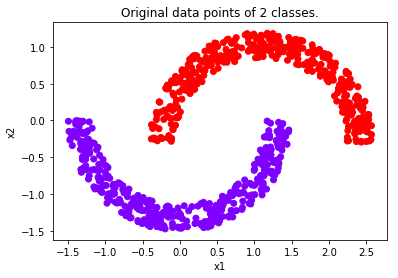

In [5]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.ravel(),cmap='rainbow') 
plt.title('Original data points of 2 classes.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Choosing the Penalty Parameter and Kernel To be Used

In [10]:
C=input('Enter the penalty parameter C (default C=1): ')
C = int(C)

gma=0.5
K=input('Enter the kernel to be used. \n 1: linear\n2: poly\n3: RBF(Gaussian)\n')
K = int(K)

deg=3 # default degree for Polynomial Kernel

Enter the penalty parameter C (default C=1): 1
Enter the kernel to be used. 
 1: linear
2: poly
3: RBF(Gaussian)
1


### Choosing the Model Based on Above Desided Parameters

In [11]:
if K==1:
    Kernel='linear'
    model = SVC(C=C,kernel = Kernel)

elif K==2:
    Kernel='poly'
    print('Using kernel poly=(a(x,x)+b)^d /n')
    deg=input('\n Enter Degree of polynomial (default deg=3): \n')    
    a=input('Enter value of a:  \n')
    b=input('Enter the value of b: \n')
    model = SVC(C=C,kernel = Kernel,degree=deg, gamma=a,coef0=b)
else:
    Kernel='rbf'
    gma=input('\n Enter width(gamma) of the RBF kernel: RBF=exp(-gamma(x-x)^2)\n');
    model = SVC(C=C,kernel = Kernel, gamma=gma, random_state = 0)   

### Fitting The SVM Model

In [12]:
model.fit(X_train, y_train)

/home/ubaidmanzoor/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Predicting the Test set results

In [22]:
y_pred = model.predict(X_test) 

### save the model to disk

In [13]:
filename = 'SVM_model.sav'
pickle.dump(model, open(filename, 'wb'))

### get support vectors

In [14]:
s_vec=model.support_vectors_

### get indices of support vectors

In [15]:
s_vec_ind=model.support_ 

### get number of support vectors for each class

In [16]:
s_vec_count=model.n_support_ 

### save the model file details in txt file

In [17]:
file = open("model_file.txt","w")
file.write("Kernel = "+Kernel)
file.write("\n")
file.write("Penalty C = "+str(C))
file.write("\n")
file.write("support vectors")
file.write("\n")
#s_vec=float(s_vec)
np.savetxt(file,s_vec,fmt='%f')
file.write("\n")
file.write("support vectors index")
file.write("\n")

np.savetxt(file,s_vec_ind,fmt='%d')
#file.write('jj')
file.close()

### loading the model from disk

In [7]:

loaded_model = pickle.load(open(filename, 'rb'))
s_vec=model.support_vectors_ # get support vectors
print "The Support Vector points are: \n",s_vec
s_vec_ind=model.support_ # get indices of support vectors

print 'The Number of SV: ', len(s_vec_ind), "(Out of:",len(y_train)," training points)\n"
print "Indices of support vectors: \n",s_vec_ind
s_vec_count=model.n_support_ # get number of support vectors for each class

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("The Support Vector points are: \n",s_vec)? (<ipython-input-7-183206fbc299>, line 4)

In [19]:
al=np.abs(model.dual_coef_)
print("##################################")
print("Corresponding Alpha values of Support Vectors:")
print(al)
print("###################################")

##################################
Corresponding Alpha values of Support Vectors:
[[0.08737826 1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         0.40643276 1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.   

### Printing The Confusion Matrix and Accuray 
<p>Both Gives the Idea How good Over Model Is.. </p>

In [23]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n",cm)
accuracy =accuracy_score(y_test, y_pred) 
print("Accuracy=",accuracy*100)

Confusion Matrix: 
 [[121   4]
 [ 10 115]]
Accuracy= 94.39999999999999


# Visualising the Training set results

Text(0, 0.5, 'X2')

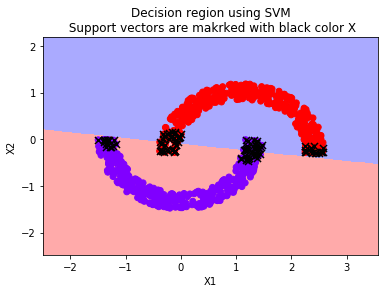

In [24]:

X_set, y_set = X_train, y_train
plt.figure(1)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

Z=model.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.pcolormesh(X1, X2, Z,cmap=cmap_1)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.ravel(),cmap='rainbow') 
plt.scatter(X_train[s_vec_ind,0], X_train[s_vec_ind, 1],marker='x',s=50,c='black') 
plt.title('Decision region using SVM\n Support vectors are makrked with black color X')
plt.xlabel('X1')
plt.ylabel('X2')

# Visualising the Test set results

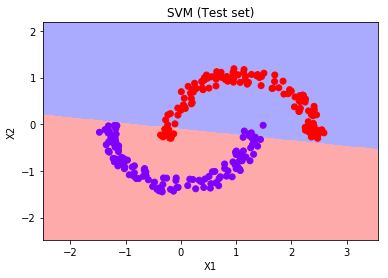

In [25]:
plt.figure(2)
plt.pcolormesh(X1, X2, Z,cmap=cmap_1)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test.ravel(),cmap='rainbow') 
plt.title('SVM (Test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
